<a href="https://colab.research.google.com/drive/1CP_1pjdfpLAVa7QacrItO5SsFwXaSFwJ#scrollTo=7Y732TYhyZ_q" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



In [ ]:
!pip install -q \
  pandas \
  numpy \
  matplotlib \
  seaborn \
  scikit-learn \
  wordcloud \
  tensorflow \
  transformers \
  ace_tools_open \
  scipy \
  peft bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6

In [ ]:
!pip install -q git+https://github.com/NX-AI/xlstm.git
!pip install -q omegaconf dacite torch torchvision torchaudio --upgrade

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.0/349.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 56.6 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import ace_tools_open as tools
import ast

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from sklearn.metrics import silhouette_score

import torch

from transformers import pipeline
from transformers import AutoTokenizer
from xlstm import xLSTMLMModel, xLSTMLMModelConfig
from omegaconf import OmegaConf
from dacite import from_dict
from dacite import Config as DaciteConfig
import torch.nn as nn
import torch.nn.functional as F

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim


In [ ]:
data = pd.read_csv('Product Review Large Data.csv')
data

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10966,ACCEVQZABYWJHRHF,NaN,Flipkart,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,2019-07-02T14:40:43Z,2020-08-33T08:28:46Z,NaN,NaN,NaN,...,4.0,NaN,this head phnes give good base in pluged ears ...,Good quality product,NaN,NaN,NaN,NaN,NaN,NaN
10967,ACCEVQZABYWJHRHF,NaN,Flipkart,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,2019-07-02T14:40:43Z,2020-08-33T08:28:46Z,NaN,NaN,NaN,...,5.0,NaN,This so far is one of the best headphones I've...,Awesome,NaN,NaN,NaN,NaN,NaN,NaN
10968,ACCEVQZABYWJHRHF,NaN,Flipkart,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,2019-07-02T14:40:43Z,2020-08-33T08:28:46Z,NaN,NaN,NaN,...,4.0,NaN,I am a BASS LOVER and all others like me read ...,Really Nice,NaN,NaN,NaN,NaN,NaN,NaN
10969,ACCEVQZABYWJHRHF,NaN,Flipkart,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,2019-07-02T14:40:43Z,2020-08-33T08:28:46Z,NaN,NaN,NaN,...,5.0,NaN,After use of one month........ It is an excell...,Super!,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data.columns)

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


### select target columns
•	“Categories”
•	“name”
•	“prices”
•	“reviews.text”
•	“reviews.title”
•	“reviews.rating”


In [ ]:
df = data[['id', 'categories',  'name', 'prices', 'reviews.text', 'reviews.title','reviews.rating']]
df

,id,categories,name,prices,reviews.text,reviews.title,reviews.rating
0,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",5.0
1,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",Allow me to preface this with a little history...,One Simply Could Not Ask For More,5.0
2,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,4.0
3,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",I bought one of the first Paperwhites and have...,Love / Hate relationship,5.0
4,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",I have to say upfront - I don't like coroporat...,I LOVE IT,5.0
...,...,...,...,...,...,...,...
10966,ACCEVQZABYWJHRHF,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,NaN,this head phnes give good base in pluged ears ...,Good quality product,4.0
10967,ACCEVQZABYWJHRHF,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,NaN,This so far is one of the best headphones I've...,Awesome,5.0
10968,ACCEVQZABYWJHRHF,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,NaN,I am a BASS LOVER and all others like me read ...,Really Nice,4.0
10969,ACCEVQZABYWJHRHF,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,NaN,After use of one month........ It is an excell...,Super!,5.0


In [ ]:
df = data[['id', 'categories',  'name', 'prices', 'reviews.text', 'reviews.title','reviews.rating']]
# cleaning the code
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Drop rows with missing critical values
df = df.dropna(subset=['categories', 'name', 'reviews.text', 'reviews.rating'])
df

,id,categories,name,prices,reviews.text,reviews.title,reviews.rating
0,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",5.0
1,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",Allow me to preface this with a little history...,One Simply Could Not Ask For More,5.0
2,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,4.0
3,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",I bought one of the first Paperwhites and have...,Love / Hate relationship,5.0
4,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",I have to say upfront - I don't like coroporat...,I LOVE IT,5.0
...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,"Amazon Devices & Accessories,Amazon Device Acc...",Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,3.0
1593,AVpfo9ukilAPnD_xfhuj,"Amazon Devices & Accessories,Amazon Device Acc...",Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",I have had to change the batteries in this rem...,Battery draining remote!!!!,1.0
1594,AVpfo9ukilAPnD_xfhuj,"Amazon Devices & Accessories,Amazon Device Acc...",Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...","Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,1.0
1595,AVpfo9ukilAPnD_xfhuj,"Amazon Devices & Accessories,Amazon Device Acc...",Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",It does the job but is super over priced. I fe...,Overpriced,3.0


🧠 Devices available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7943 - loss: 0.6849
Epoch 2/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8662 - loss: 0.4996
Epoch 3/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9084 - loss: 0.3695
Epoch 4/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8883 - loss: 0.4097
Epoch 5/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8845 - loss: 0.4089
Epoch 6/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8968 - loss: 0.3758
Epoch 7/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9035 - loss: 0.3726
Epoch 8/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9045 - loss: 0.3640
Epoch 9/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8940 - loss: 0.4090
Epoch 10/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - a

,reviews.text,reviews.rating,rating_sentiment,text_sentiment,sentiment_mismatch
97,Like a previous reviewer mentioned it is fabri...,3.0,neutral,positive,True
108,"After 15 months, my 500+ tablet is no longer u...",1.0,negative,positive,True
153,Like a previous reviewer mentioned it is fabri...,3.0,neutral,positive,True
166,Like a previous reviewer mentioned it is fabri...,3.0,neutral,positive,True
171,"Without an on / off button, I have found that ...",3.0,neutral,positive,True
175,I have the original Nvidia Shield TV (not the ...,4.0,positive,neutral,True
177,I purchased the original Kindle Fire in 2011 a...,5.0,positive,neutral,True
182,"Without an on / off button, I have found that ...",3.0,neutral,positive,True
187,The connection drop's out on this unit pretty ...,1.0,negative,positive,True
221,Like a previous reviewer mentioned it is fabri...,3.0,neutral,positive,True


                                         reviews.text rating_sentiment  \
0   I initially had trouble deciding between the p...         positive   
1   Allow me to preface this with a little history...         positive   
2   I am enjoying it so far. Great for reading. Ha...         positive   
3   I bought one of the first Paperwhites and have...         positive   
4   I have to say upfront - I don't like coroporat...         positive   
13  Had older model, that you could text to speech...         positive   
14  This is a review of the Kindle Paperwhite laun...         positive   
15  I love my kindle! I got one for my fiance on h...         positive   
16  Vraiment bon petit appareil , lger et facile d...         positive   
17  Exactly what it is supposed to be. Works great...         positive   

   text_sentiment  sentiment_mismatch  
0        positive               False  
1        positive               False  
2        positive               False  
3        positive        

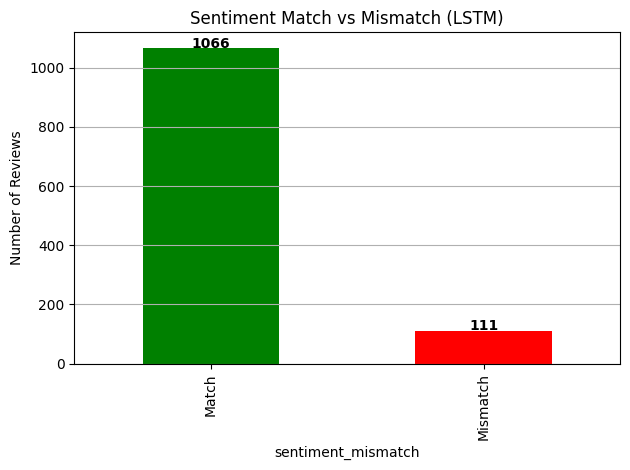

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Dense, RNN, LSTMCell
from sklearn.model_selection import train_test_split

# -------------------------------------
# Check available devices (optional)
# -------------------------------------
print("Devices available:", tf.config.list_physical_devices())

# -------------------------------------
# 1. Preprocessing & Cleaning
# -------------------------------------
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

# Clean review text
df["clean_text"] = df["reviews.text"].astype(str).apply(clean_text)

# Label encoding: 0 = negative, 1 = neutral, 2 = positive
df["label"] = df["reviews.rating"].apply(lambda x: 2 if x >= 4 else (0 if x <= 2 else 1))

# -------------------------------------
# 2. Tokenization & Padding
# -------------------------------------
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["clean_text"])
sequences = tokenizer.texts_to_sequences(df["clean_text"])
padded = pad_sequences(sequences, maxlen=100, padding='post')

# -------------------------------------
# 3. Train/Test Split
# -------------------------------------
X_train, X_test, y_train, y_test = train_test_split(padded, df["label"], test_size=0.2, random_state=42)

# -------------------------------------
# 4. Build & Train LSTM Model (CPU mode)
# -------------------------------------
with tf.device('/CPU:0'):
    model = Sequential([
        Embedding(input_dim=10000, output_dim=64),
        RNN(LSTMCell(64)),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1)

# -------------------------------------
# 5. Predict & Label Sentiments
# -------------------------------------
with tf.device('/CPU:0'):
    pred = np.argmax(model.predict(padded), axis=1)

# Align prediction index to df to avoid NaNs
df["text_sentiment"] = pd.Series(pred, index=df.index).map({0: "negative", 1: "neutral", 2: "positive"})
df["rating_sentiment"] = df["reviews.rating"].apply(lambda x: "positive" if x >= 4 else ("negative" if x <= 2 else "neutral"))
df["sentiment_mismatch"] = df["text_sentiment"] != df["rating_sentiment"]

df_lstm = df.copy()
# -------------------------------------
# 6. Visual Inspection Table
# -------------------------------------
# Sort or filter mismatches (or just sample)
inspection_df = df_lstm[[
    "reviews.text",
    "reviews.rating",
    "rating_sentiment",
    "text_sentiment",
    "sentiment_mismatch"
]]

# Display mismatches for inspection
print("\n Sample LSTM Prediction Mismatches:")
display(inspection_df[inspection_df["sentiment_mismatch"]].head(20))  # Show top 20 mismatches

# Save LSTM-specific results
df_lstm = df.copy()

# -------------------------------------
# 7. Display & Visualize Results
# -------------------------------------
print(df_lstm[["reviews.text", "rating_sentiment", "text_sentiment", "sentiment_mismatch"]].head(10))

match_counts = df_lstm["sentiment_mismatch"].value_counts().rename(index={False: "Match", True: "Mismatch"})
ax = match_counts.plot(kind="bar", title="Sentiment Match vs Mismatch (LSTM)", color=["green", "red"])

# Annotate bar values
for i, val in enumerate(match_counts.values):
    ax.text(i, val + 1, str(val), ha='center', fontweight='bold')

plt.grid(axis="y")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


#### xLSTM

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'verbose': True, 'with_cuda': True, 'extra_ldflags': ['-L/usr/local/cuda/lib', '-lcublas'], 'extra_cflags': ['-DSLSTM_HIDDEN_SIZE=128', '-DSLSTM_BATCH_SIZE=8', '-DSLSTM_NUM_HEADS=4', '-DSLSTM_NUM_STATES=4', '-DSLSTM_DTYPE_B=float', '-DSLSTM_DTYPE_R=__nv_bfloat16', '-DSLSTM_DTYPE_W=__nv_bfloat16', '-DSLSTM_DTYPE_G=__nv_bfloat16', '-DSLSTM_DTYPE_S=__nv_bfloat16', '-DSLSTM_DTYPE_A=float', '-DSLSTM_NUM_GATES=4', '-DSLSTM_SIMPLE_AGG=true', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL_VALID=false', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL=0.0', '-DSLSTM_FORWARD_CLIPVAL_VALID=false', '-DSLSTM_FORWARD_CLIPVAL=0.0', '-U__CUDA_NO_HALF_OPERATORS__', '-U__CUDA_NO_HALF_CONVERSIONS__', '-U__CUDA_NO_BFLOAT16_OPERATORS__', '-U__CUDA_NO_BFLOAT16_CONVERSIONS__', '-U__CUDA_NO_BFLOAT162_OPERATORS__', '-U__CUDA_NO_BFLOAT162_CONVERSIONS__'], 'extra_cuda_cflags': ['-Xptxas="-v"', '-gencode', 'arch=compute_80,code=compute_80', '-res-usage', '--use_fast_math', '-O3', '-Xptxas -O3', '--extra-device-vectorization', '-DSLSTM_

Using /root/.cache/torch_extensions as PyTorch extensions root...
Creating extension directory /root/.cache/torch_extensions/slstm_HS128BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/slstm_HS128BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0/build.ninja...
Building extension module slstm_HS128BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module slstm_HS128BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
/usr/local/lib/python3.11/dist-packages/xlstm/blocks/slstm/cell.py:543: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @conditional_decorator(
/usr/local/lib/python3.11/dist-packages/xlstm/blocks/slstm/cell.py:568: FutureWarning: `torch.c

Epoch 1, Loss: 261.2844
Epoch 2, Loss: 180.2469
Epoch 3, Loss: 144.8378
Epoch 4, Loss: 106.6924
Epoch 5, Loss: 74.6477

🔍 Sample xLSTM Prediction Mismatches:


,reviews.text,reviews.rating,rating_sentiment,text_sentiment,sentiment_mismatch
5,very overpriced!,2.0,negative,positive,True
10,"I've got mixed feelings on this one, unfortuna...",3.0,neutral,positive,True
16,Great sound..easy to connect..problem is.. its...,3.0,neutral,positive,True
21,It blows my mind theres not a class action law...,3.0,neutral,positive,True
28,I was really excited for this speaker. Got it ...,3.0,neutral,positive,True
34,In this day and age of rectangles with screens...,2.0,negative,positive,True
39,"This is a great controller for our Fire TV, I ...",2.0,negative,positive,True
41,Horrible cover for my new (third) Kindle!!! An...,1.0,negative,positive,True
56,"While it seemed to work fine, the Tap does not...",2.0,negative,positive,True
86,"I've got mixed feelings on this one, unfortuna...",3.0,neutral,positive,True


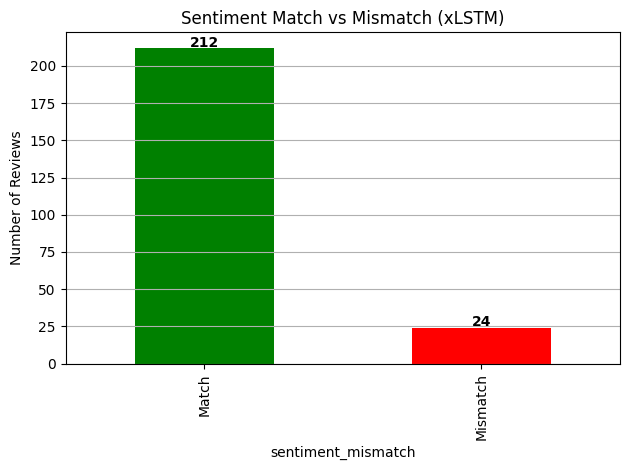

In [ ]:
# ----------------------------------
# 🧠 Standard Imports
# ----------------------------------
import os
import shutil
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from xlstm import xLSTMLMModel, xLSTMLMModelConfig
from omegaconf import OmegaConf
from dacite import from_dict, Config as DaciteConfig

# ----------------------------------
# 🛠 Fix CUDA xLSTM Loading Issue (Colab T4)
# ----------------------------------
# Force clean rebuild of xLSTM custom CUDA extension
torch_ext_dir = os.path.expanduser("~/.cache/torch_extensions")
if os.path.exists(torch_ext_dir):
    shutil.rmtree(torch_ext_dir)

os.environ["TORCH_FORCE_RECOMPILE"] = "1"
os.environ["TORCH_EXTENSIONS_DIR"] = torch_ext_dir
os.environ["TORCH_CUDA_ARCH_LIST"] = "7.5"  # ✅ T4 GPU = compute capability 7.5
os.environ["CUDA_HOME"] = "/usr/local/cuda"
os.environ["CC"] = "gcc"
os.environ["CXX"] = "g++"

# ----------------------------------
# 1. Load & Prepare Data
# ----------------------------------
df["label"] = df["reviews.rating"].apply(lambda x: 2 if x >= 4 else (0 if x <= 2 else 1))
df = df.dropna(subset=["reviews.text", "label"])

tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

def encode(text):
    return tokenizer.encode(text, truncation=True, padding="max_length", max_length=256)

df["input_ids"] = df["reviews.text"].apply(encode)
df = df.dropna(subset=["input_ids"])

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

X_train = torch.tensor(df_train["input_ids"].tolist(), dtype=torch.long)
y_train = torch.tensor(df_train["label"].tolist(), dtype=torch.long)
X_test = torch.tensor(df_test["input_ids"].tolist(), dtype=torch.long)
y_test = torch.tensor(df_test["label"].tolist(), dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=4, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=4)

# ----------------------------------
# 2. xLSTM Config & Model
# ----------------------------------
xlstm_cfg = """
vocab_size: 50304
mlstm_block:
  mlstm:
    conv1d_kernel_size: 4
    qkv_proj_blocksize: 4
    num_heads: 4
slstm_block:
  slstm:
    backend: cuda
    num_heads: 4
    conv1d_kernel_size: 4
    bias_init: powerlaw_blockdependent
  feedforward:
    proj_factor: 1.3
    act_fn: gelu
context_length: 256
num_blocks: 7
embedding_dim: 128
slstm_at: [1]
"""

cfg = OmegaConf.create(xlstm_cfg)
cfg = from_dict(data_class=xLSTMLMModelConfig, data=OmegaConf.to_container(cfg), config=DaciteConfig(strict=True))

class xLSTMSentimentClassifier(nn.Module):
    def __init__(self, cfg, num_labels=3):
        super().__init__()
        self.backbone = xLSTMLMModel(cfg)
        self.dropout = nn.Dropout(0.4)
        self.classifier = nn.Linear(cfg.vocab_size, num_labels)

    def forward(self, input_ids):
        logits = self.backbone(input_ids)  # (B, T, vocab_size)
        pooled = logits.mean(dim=1)        # (B, vocab_size)
        return self.classifier(self.dropout(pooled))

# Instantiate model
model = xLSTMSentimentClassifier(cfg).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-4)
loss_fn = nn.CrossEntropyLoss()

# ----------------------------------
# 3. Train
# ----------------------------------
for epoch in range(5):
    model.train()
    total_loss = 0
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        optimizer.zero_grad()
        logits = model(batch_x)
        loss = loss_fn(logits, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# ----------------------------------
# 4. Predict & Analyze
# ----------------------------------
model.eval()
all_preds = []
with torch.no_grad():
    for batch_x, _ in test_loader:
        batch_x = batch_x.cuda()
        logits = model(batch_x)
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())

assert len(all_preds) == len(df_test)

df_xlstm = df_test.reset_index(drop=True).copy()
df_xlstm["text_sentiment"] = all_preds
df_xlstm["text_sentiment"] = df_xlstm["text_sentiment"].map({0: "negative", 1: "neutral", 2: "positive"})
df_xlstm["rating_sentiment"] = df_xlstm["label"].map({0: "negative", 1: "neutral", 2: "positive"})
df_xlstm["sentiment_mismatch"] = df_xlstm["text_sentiment"] != df_xlstm["rating_sentiment"]

# ----------------------------------
# 5. Visual Inspection Table
# ----------------------------------
# Show top 20 mismatches between xLSTM prediction and rating-based sentiment
inspection_df = df_xlstm[[
    "reviews.text",
    "reviews.rating",
    "rating_sentiment",
    "text_sentiment",
    "sentiment_mismatch"
]]

print("\n🔍 Sample xLSTM Prediction Mismatches:")
display(inspection_df[inspection_df["sentiment_mismatch"]].head(20))  # For Colab/Jupyter
# Or use print if you're not in a notebook:
# print(inspection_df[inspection_df["sentiment_mismatch"]].head(20).to_string(index=False))


# ----------------------------------
# 6. Plot Results
# ----------------------------------
match_counts = df_xlstm["sentiment_mismatch"].value_counts().rename(index={False: "Match", True: "Mismatch"})

ax = match_counts.plot(kind="bar", title="Sentiment Match vs Mismatch (xLSTM)", color=["green", "red"])

# 🧾 Annotate bar values
for i, val in enumerate(match_counts.values):
    ax.text(i, val + 1, str(val), ha='center', fontweight='bold')

plt.ylabel("Number of Reviews")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [ ]:
# 📦 xLSTM Sentiment Classifier - Modular Colab Pipeline

import os
import shutil
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from dacite import from_dict, Config as DaciteConfig
from xlstm import xLSTMLMModel, xLSTMLMModelConfig

# ⚙️ Config
CUDA_ARCH = "7.5"  # Default for T4 GPU on Colab
MODEL_NAME = "gpt2"
MAX_LEN = 256
BATCH_SIZE = 4
NUM_LABELS = 3
EPOCHS = 5

# ----------------------------------
# ⚙️ Environment Setup for Colab T4 GPU
# ----------------------------------
torch_ext_dir = os.path.expanduser("~/.cache/torch_extensions")
if os.path.exists(torch_ext_dir):
    shutil.rmtree(torch_ext_dir)

os.environ["TORCH_FORCE_RECOMPILE"] = "1"
os.environ["TORCH_EXTENSIONS_DIR"] = torch_ext_dir
os.environ["TORCH_CUDA_ARCH_LIST"] = "7.5"  # ✅ T4 GPU
os.environ["CUDA_HOME"] = "/usr/local/cuda"
os.environ["CC"] = "gcc"
os.environ["CXX"] = "g++"

# ----------------------------------
# 1. Load & Preprocess Data
# ----------------------------------
def prepare_data(df, model_name="gpt2", max_len=256):
    df = df.dropna(subset=["reviews.text", "reviews.rating"])
    df["label"] = df["reviews.rating"].apply(lambda x: 2 if x >= 4 else (0 if x <= 2 else 1))

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokenizer.pad_token = tokenizer.eos_token

    def encode(text):
        return tokenizer.encode(text, truncation=True, padding="max_length", max_length=max_len)

    df["input_ids"] = df["reviews.text"].apply(encode)
    df = df.dropna(subset=["input_ids"])

    return df, tokenizer

# ----------------------------------
# 2. Define xLSTM Config and Model
# ----------------------------------
xlstm_cfg = """
vocab_size: 50304
mlstm_block:
  mlstm:
    conv1d_kernel_size: 4
    qkv_proj_blocksize: 4
    num_heads: 4
slstm_block:
  slstm:
    backend: cuda
    num_heads: 4
    conv1d_kernel_size: 4
    bias_init: powerlaw_blockdependent
  feedforward:
    proj_factor: 1.3
    act_fn: gelu
context_length: 256
num_blocks: 7
embedding_dim: 128
slstm_at: [1]
"""
cfg = OmegaConf.create(xlstm_cfg)
cfg = from_dict(data_class=xLSTMLMModelConfig, data=OmegaConf.to_container(cfg), config=DaciteConfig(strict=True))

class xLSTMSentimentClassifier(nn.Module):
    def __init__(self, cfg, num_labels=3):
        super().__init__()
        self.backbone = xLSTMLMModel(cfg)
        self.dropout = nn.Dropout(0.4)
        self.classifier = nn.Linear(cfg.vocab_size, num_labels)

    def forward(self, input_ids):
        logits = self.backbone(input_ids)
        pooled = logits.mean(dim=1)
        return self.classifier(self.dropout(pooled))

# ----------------------------------
# 3. Training & Evaluation
# ----------------------------------
def train_model(model, train_loader, optimizer, loss_fn, epochs=5):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for x, y in train_loader:
            x, y = x.cuda(), y.cuda()
            optimizer.zero_grad()
            logits = model(x)
            loss = loss_fn(logits, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    with torch.no_grad():
        for x, _ in test_loader:
            x = x.cuda()
            logits = model(x)
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
    return all_preds

# ----------------------------------
# 4. Pipeline Wrapper
# ----------------------------------
def run_xlstm_pipeline(df):
    df, tokenizer = prepare_data(df)

    # Split Data
    df_train, df_test = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

    X_train = torch.tensor(df_train["input_ids"].tolist(), dtype=torch.long)
    y_train = torch.tensor(df_train["label"].tolist(), dtype=torch.long)
    X_test = torch.tensor(df_test["input_ids"].tolist(), dtype=torch.long)
    y_test = torch.tensor(df_test["label"].tolist(), dtype=torch.long)

    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=4, shuffle=True)
    test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=4)

    # Build model
    model = xLSTMSentimentClassifier(cfg).cuda()
    optimizer = torch.optim.Adam(model.parameters(), lr=2e-4)
    loss_fn = nn.CrossEntropyLoss()

    # Train
    train_model(model, train_loader, optimizer, loss_fn)

    # Predict
    all_preds = evaluate_model(model, test_loader)

    # Analyze
    df_xlstm = df_test.reset_index(drop=True).copy()
    df_xlstm["text_sentiment"] = all_preds
    df_xlstm["text_sentiment"] = df_xlstm["text_sentiment"].map({0: "negative", 1: "neutral", 2: "positive"})
    df_xlstm["rating_sentiment"] = df_xlstm["label"].map({0: "negative", 1: "neutral", 2: "positive"})
    df_xlstm["sentiment_mismatch"] = df_xlstm["text_sentiment"] != df_xlstm["rating_sentiment"]

    # Show mismatches
    print("\n🔍 Sample xLSTM Prediction Mismatches:")
    display(df_xlstm[df_xlstm["sentiment_mismatch"]].head(10))  # For Colab/Jupyter


    # Plot match vs mismatch with count labels
    match_counts = df_xlstm["sentiment_mismatch"].value_counts().rename(index={False: "Match", True: "Mismatch"})

    ax = match_counts.plot(kind="bar", title="Sentiment Match vs Mismatch (xLSTM)", color=["green", "red"])

    # Add count labels below each bar
    for i, val in enumerate(match_counts.values):
        ax.text(i, val + 1, str(val), ha='center', va='bottom', fontweight='bold')

    plt.ylabel("Number of Reviews")
    plt.xlabel("Prediction vs Rating")
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()


    return model, df_xlstm



/usr/local/lib/python3.11/dist-packages/xlstm/blocks/slstm/cell.py:543: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @conditional_decorator(
/usr/local/lib/python3.11/dist-packages/xlstm/blocks/slstm/cell.py:568: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @conditional_decorator(


Epoch 1, Loss: 236.0703
Epoch 2, Loss: 198.6243
Epoch 3, Loss: 172.6801
Epoch 4, Loss: 145.7380
Epoch 5, Loss: 117.7292

🔍 Sample xLSTM Prediction Mismatches:


,id,categories,name,prices,reviews.text,reviews.title,reviews.rating,clean_text,label,text_sentiment,rating_sentiment,sentiment_mismatch,input_ids
3,AV00l7jV-jtxr-f30lnX,Amazon Devices,Amazon Echo Dot Case (fits Echo Dot 2nd Genera...,"[{""amountMax"":19.99,""amountMin"":19.99,""currenc...",Like a previous reviewer mentioned it is fabri...,Not all fabric or cloth.,3.0,like a previous reviewer mentioned it is fabri...,1,negative,neutral,True,"[7594, 257, 2180, 37823, 4750, 340, 318, 9664,..."
4,AVpfo9ukilAPnD_xfhuj,"Amazon Devices & Accessories,Amazon Device Acc...",Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",I have had to change the batteries in this rem...,Battery draining remote!!!!,1.0,i have had to change the batteries in this rem...,0,positive,negative,True,"[40, 423, 550, 284, 1487, 262, 13591, 287, 428..."
5,AVsRjfwAU2_QcyX9PHqe,"Amazon Devices & Accessories,Amazon Device Acc...",Amazon 5W USB Official OEM Charger and Power A...,"[{""amountMax"":19.99,""amountMin"":19.99,""currenc...",very overpriced!,Two Stars,2.0,very overpriced,0,positive,negative,True,"[548, 625, 30883, 0, 50256, 50256, 50256, 5025..."
11,AVzRlpC8glJLPUi8FbQA,"Amazon Devices,Kindle Store",Amazon Echo Dot Case (fits Echo Dot 2nd Genera...,"[{""amountMax"":19.99,""amountMin"":19.99,""currenc...",Like a previous reviewer mentioned it is fabri...,Not all fabric or cloth.,3.0,like a previous reviewer mentioned it is fabri...,1,negative,neutral,True,"[7594, 257, 2180, 37823, 4750, 340, 318, 9664,..."
13,AV000tWuGV-KLJ3ac2-b,Amazon Devices,Echo Show - Black,"[{""amountMax"":229.99,""amountMin"":229.99,""curre...",I waited two days to set up Show to give mysel...,Yeehaw,5.0,i waited two days to set up show to give mysel...,2,neutral,positive,True,"[40, 13488, 734, 1528, 284, 900, 510, 5438, 28..."
16,AVpfpK8KLJeJML43BCuD,"Amazon Devices,Home,Smart Home & Connected Liv...",Amazon Tap - Alexa-Enabled Portable Bluetooth ...,"[{""amountMax"":129.99,""amountMin"":129.99,""curre...",Great sound..easy to connect..problem is.. its...,Its a pain to use,3.0,great soundeasy to connectproblem is its not v...,1,positive,neutral,True,"[13681, 2128, 492, 38171, 284, 2018, 492, 4557..."
21,AVpfODXeilAPnD_xXeUd,"Amazon Devices & Accessories,Amazon Device Acc...",Replacement Remote for Amazon Fire TV Stick,"[{""amountMax"":14.99,""amountMin"":14.99,""currenc...",It blows my mind theres not a class action law...,Decent replacement for something that shouldnt...,3.0,it blows my mind theres not a class action law...,1,negative,neutral,True,"[1026, 20385, 616, 2000, 262, 411, 407, 257, 1..."
28,AVpfpK8KLJeJML43BCuD,"Amazon Devices,Home,Smart Home & Connected Liv...",Amazon Tap - Alexa-Enabled Portable Bluetooth ...,"[{""amountMax"":129.99,""amountMin"":129.99,""curre...",I was really excited for this speaker. Got it ...,I was excited but..,3.0,i was really excited for this speaker got it a...,1,positive,neutral,True,"[40, 373, 1107, 6568, 329, 428, 10834, 13, 118..."
34,AVzRkFTFvKc47QAVd43-,"Amazon Devices,Kindle Store",All-New Amazon Fire HD 8 Tablet Case (7th Gene...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",In this day and age of rectangles with screens...,Just Bad,2.0,in this day and age of rectangles with screens...,0,positive,negative,True,"[818, 428, 1110, 290, 2479, 286, 13621, 27787,..."
39,AV00lzd5GV-KLJ3ac0ul,Amazon Devices,All-New Amazon Fire TV Game Controller,"[{""amountMax"":49.99,""amountMin"":49.99,""currenc...","This is a great controller for our Fire TV, I ...",Great controller with 2 major problems! Not re...,2.0,this is a great controller for our fire tv i p...,0,positive,negative,True,"[1212, 318, 257, 1049, 10444, 329, 674, 3764, ..."


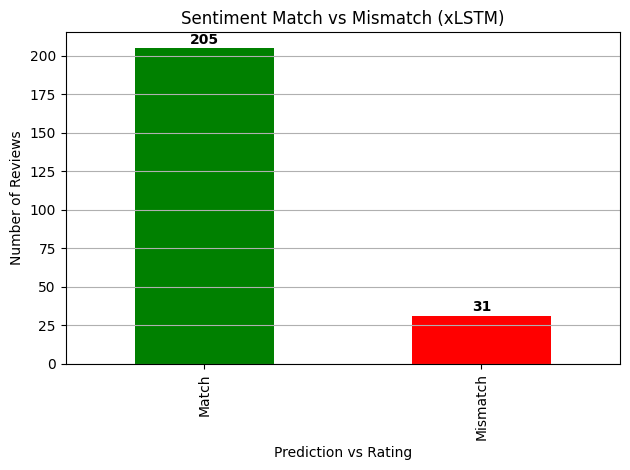

In [ ]:
model, df_xlstm = run_xlstm_pipeline(df)

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-base and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



🔍 Sample LLM (BART) Prediction Mismatches:


,reviews.text,reviews.rating,rating_sentiment,text_sentiment,sentiment_mismatch
97,Like a previous reviewer mentioned it is fabri...,3.0,neutral,neutral,True
108,"After 15 months, my 500+ tablet is no longer u...",1.0,negative,neutral,True
153,Like a previous reviewer mentioned it is fabri...,3.0,neutral,neutral,True
166,Like a previous reviewer mentioned it is fabri...,3.0,neutral,neutral,True
171,"Without an on / off button, I have found that ...",3.0,neutral,neutral,True
175,I have the original Nvidia Shield TV (not the ...,4.0,positive,neutral,True
177,I purchased the original Kindle Fire in 2011 a...,5.0,positive,neutral,True
182,"Without an on / off button, I have found that ...",3.0,neutral,neutral,True
187,The connection drop's out on this unit pretty ...,1.0,negative,neutral,True
221,Like a previous reviewer mentioned it is fabri...,3.0,neutral,neutral,True


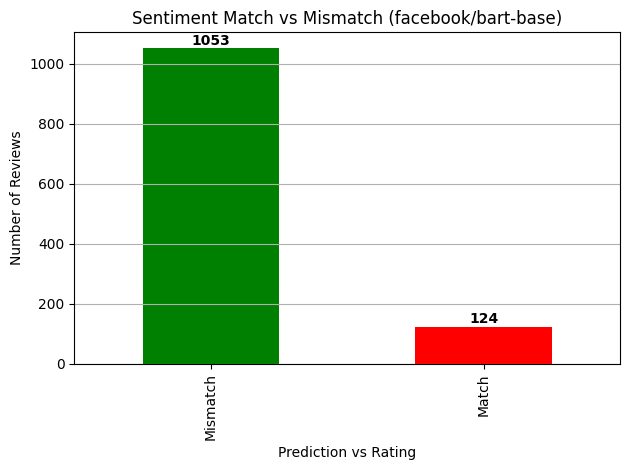

In [ ]:
# Copy original dataframe for LLM-specific predictions
df_llm = df.copy()

# Label rating-based sentiment
df_llm["rating_sentiment"] = df_llm["reviews.rating"].apply(
    lambda x: "positive" if x >= 4 else ("negative" if x <= 2 else "neutral")
)

# Load sentiment analysis pipeline from Hugging Face
classifier = pipeline("text-classification", model="facebook/bart-base", top_k=None)

# Predict sentiment from review text using the LLM
def get_sentiment(text):
    try:
        result = classifier(text[:512])[0]  # Truncate to 512 tokens
        if isinstance(result, list):
            result = max(result, key=lambda x: x['score'])  # Choose label with highest confidence
        label = result['label'].lower()
        return "positive" if "pos" in label else ("negative" if "neg" in label else "neutral")
    except:
        return "neutral"

# Apply sentiment classifier
df_llm["text_sentiment"] = df_llm["reviews.text"].apply(get_sentiment)


# ----------------------------------
# Visual Inspection Table
# ----------------------------------
inspection_df = df_llm[[
    "reviews.text",
    "reviews.rating",
    "rating_sentiment",
    "text_sentiment",
    "sentiment_mismatch"
]]

print("\n🔍 Sample LLM (BART) Prediction Mismatches:")
display(inspection_df[inspection_df["sentiment_mismatch"]].head(20))  # For Colab/Jupyter
# print(inspection_df[inspection_df["sentiment_mismatch"]].head(20).to_string(index=False))  # For script

# Compare with rating-based sentiment
df_llm["sentiment_mismatch"] = df_llm["text_sentiment"] != df_llm["rating_sentiment"]

# Plot match vs mismatch with count labels
match_counts = df_llm["sentiment_mismatch"].value_counts().rename(index={False: "Match", True: "Mismatch"})

ax = match_counts.plot(kind="bar", title="Sentiment Match vs Mismatch (facebook/bart-base)", color=["green", "red"])

# Add value labels on each bar
for i, val in enumerate(match_counts.values):
    ax.text(i, val + 1, str(val), ha='center', va='bottom', fontweight='bold')

plt.ylabel("Number of Reviews")
plt.xlabel("Prediction vs Rating")
plt.grid(axis="y")
plt.tight_layout()
plt.show()



In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
# ----------------------------------
# 🧑‍💻 QLoRA Fine-Tuning Pipeline (BERT - Colab T4 Optimized)
# ----------------------------------

import pandas as pd
import torch
import torch.nn as nn
from transformers import (
    AutoTokenizer,
    AutoModel,
    TrainingArguments,
    Trainer,
    BitsAndBytesConfig,
)
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from peft import get_peft_model, LoraConfig, TaskType, prepare_model_for_kbit_training
import matplotlib.pyplot as plt
import os

# ✅ Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Prepare Data
df_ft = df.copy()
df_ft = df_ft.dropna(subset=["reviews.text", "reviews.rating"])
df_ft = df_ft[df_ft["reviews.rating"] != 3]  # ❌ Remove neutral ratings
df_ft["label"] = df_ft["reviews.rating"].apply(lambda x: 1 if x >= 4 else 0)
df_ft = df_ft.sample(n=5000, random_state=42, replace=True)  # ⬆️ More training data

# ✅ Tokenizer
model_id = "google/bert_uncased_L-4_H-256_A-4"
tokenizer = AutoTokenizer.from_pretrained(model_id)

ds = Dataset.from_pandas(df_ft[["reviews.text", "label"]])

def tokenize(example):
    return tokenizer(example["reviews.text"], truncation=True, padding="max_length", max_length=128)

ds = ds.map(tokenize, batched=True)
ds = ds.train_test_split(test_size=0.2)

# ✅ Load Quantized Base Encoder
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
)

encoder = AutoModel.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map="auto"
)

# ✅ Custom Classifier
class BertClassifier(nn.Module):
    def __init__(self, encoder, hidden_size=256, num_labels=2):
        super().__init__()
        self.encoder = encoder
        self.dropout = nn.Dropout(0.05)
        self.classifier = nn.Linear(hidden_size, num_labels)

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        pooled = outputs.last_hidden_state[:, 0]
        logits = self.classifier(self.dropout(pooled))
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
            return {"loss": loss, "logits": logits}
        return {"logits": logits}

# ✅ Prepare QLoRA
encoder.gradient_checkpointing_enable()
encoder = prepare_model_for_kbit_training(encoder)

lora_target_modules = ["query", "value"]

encoder = get_peft_model(encoder, LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=lora_target_modules,
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.FEATURE_EXTRACTION,
))

# ✅ Final Model
model = BertClassifier(encoder).to(device)

# ✅ Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = torch.argmax(torch.tensor(logits), axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# ✅ Training Args
training_args = TrainingArguments(
    output_dir="./results_qlora",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=4,
    learning_rate=2e-4,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_steps=10,
    fp16=True,
    report_to="none"
)

# ✅ Format for Trainer
ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# ✅ Train!
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds["train"],
    eval_dataset=ds["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()

# ✅ Save LoRA adapter
model.encoder.save_pretrained("./results_qlora_adapter")


config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
# ----------------------------------
# 🧠 Inference with QLoRA-FineTuned BERT Classifier
# ----------------------------------

from transformers import AutoTokenizer, AutoModel
from peft import PeftModel
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import os

# ✅ Define custom classifier again
class BertClassifier(nn.Module):
    def __init__(self, encoder, hidden_size=256, num_labels=2):
        super().__init__()
        self.encoder = encoder
        self.dropout = nn.Dropout(0.05)
        self.classifier = nn.Linear(hidden_size, num_labels)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        pooled = outputs.last_hidden_state[:, 0]
        return self.classifier(self.dropout(pooled))

# ✅ Load base model and tokenizer
base_model_id = "google/bert_uncased_L-4_H-256_A-4"
tokenizer = AutoTokenizer.from_pretrained(base_model_id)
base_model = AutoModel.from_pretrained(base_model_id)

# ✅ Load LoRA adapter
adapter_path = "./results_qlora_adapter"
if not os.path.exists(os.path.join(adapter_path, "adapter_config.json")):
    raise FileNotFoundError("❌ adapter_config.json not found. Did you save the adapter correctly?")

encoder_with_lora = PeftModel.from_pretrained(base_model, adapter_path)

# ✅ Final classifier model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertClassifier(encoder_with_lora).to(device)
model.eval()

# ✅ Prepare review data
df_llm = df.copy()
df_llm = df_llm[df_llm["reviews.rating"] != 3]  # remove neutral

# Binary labels
label_map = {0: "negative", 1: "positive"}
df_llm["rating_sentiment"] = df_llm["reviews.rating"].apply(lambda x: "positive" if x >= 4 else "negative")

# ✅ Predict sentiment
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items() if k in ["input_ids", "attention_mask"]}
    with torch.no_grad():
        logits = model(**inputs)
        pred = torch.argmax(logits, dim=1).item()
    return label_map[pred]

# ✅ Run predictions
print("\n🔍 Running sentiment predictions...")
df_llm["text_sentiment"] = df_llm["reviews.text"].astype(str).apply(predict_sentiment)
df_llm["sentiment_mismatch"] = df_llm["text_sentiment"] != df_llm["rating_sentiment"]

# ✅ Show mismatches
print("\n🔍 Sample QLoRA Prediction Mismatches:")
display(df_llm[df_llm["sentiment_mismatch"]][[
    "reviews.text", "reviews.rating", "rating_sentiment", "text_sentiment", "sentiment_mismatch"
]].head(20))

# ✅ Plot match vs mismatch with count labels
match_counts = df_llm["sentiment_mismatch"].value_counts().rename(index={False: "Match", True: "Mismatch"})

ax = match_counts.plot(
    kind="bar",
    title="Sentiment Match vs Mismatch (QLoRA BERT)",
    color=["green", "red"]
)

# Add value labels above each bar
for i, val in enumerate(match_counts.values):
    ax.text(i, val + 1, str(val), ha='center', va='bottom', fontweight='bold')

plt.ylabel("Number of Reviews")
plt.xlabel("Prediction vs Rating")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 0: Reset index to ensure row-wise alignment across all models
df_lstm = df_lstm.reset_index(drop=True)
df_xlstm = df_xlstm.reset_index(drop=True)
df_llm = df_llm.reset_index(drop=True)

# Step 1: Ensure each DataFrame has rating_sentiment
for df in [df_lstm, df_xlstm, df_llm]:
    if "rating_sentiment" not in df.columns:
        df["rating_sentiment"] = df["label"].map({0: "negative", 1: "neutral", 2: "positive"})

# Step 2: Build comparison DataFrame (row-aligned, not index-aligned)
df_comparison = pd.DataFrame({
    "true_sentiment": df_lstm["rating_sentiment"],
    "lstm_sentiment": df_lstm["text_sentiment"],
    "xlstm_sentiment": df_xlstm["text_sentiment"],
    "llm_sentiment": df_llm["text_sentiment"]
})

# Drop any rows that have NaNs in any column (safe guard)
df_comparison = df_comparison.dropna()

# Step 3: Compute match/mismatch rates
print("📊 Sentiment Match Rates:")
for model in ["lstm_sentiment", "xlstm_sentiment", "llm_sentiment"]:
    matches = df_comparison[model] == df_comparison["true_sentiment"]
    mismatch_rate = (~matches).mean()
    print(f"{model}: Match = {matches.mean():.2f}, Mismatch = {mismatch_rate:.2f}")

# Step 4: Plot mismatch bars
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
colors = ["green", "red"]

for i, model in enumerate(["lstm_sentiment", "xlstm_sentiment", "llm_sentiment"]):
    mismatch = (df_comparison[model] != df_comparison["true_sentiment"]).value_counts()
    mismatch = mismatch.rename(index={False: "Match", True: "Mismatch"})
    mismatch.plot(kind="bar", ax=ax[i], color=colors)
    ax[i].set_title(f"Sentiment Match vs Mismatch ({model.replace('_sentiment','').upper()})")
    ax[i].grid(axis="y")

plt.tight_layout()
plt.show()

# Step 5: Where text seems neutral, but rating is positive or negative
print("\n🧠 Cases where models predict 'neutral' but ratings are not:")
for model in ["lstm_sentiment", "xlstm_sentiment", "llm_sentiment"]:
    neutral_flag = (df_comparison[model] == "neutral") & (df_comparison["true_sentiment"] != "neutral")
    print(f"{model}: {neutral_flag.sum()} examples")

# Step 6: Show first few mismatched examples across all models
print("\n🔍 Sample disagreement across all models:")
print(df_comparison[
    (df_comparison["true_sentiment"] != df_comparison["lstm_sentiment"]) &
    (df_comparison["true_sentiment"] != df_comparison["xlstm_sentiment"]) &
    (df_comparison["true_sentiment"] != df_comparison["llm_sentiment"])
].head())


In [ ]:
# Step 1: Add review text and rating back from original df
df_comparison["reviews.text"] = df_lstm["reviews.text"]
df_comparison["reviews.rating"] = df_lstm["reviews.rating"]

# Step 2: Filter where ALL models disagree with the true rating-based sentiment
disagree_all = df_comparison[
    (df_comparison["true_sentiment"] != df_comparison["lstm_sentiment"]) &
    (df_comparison["true_sentiment"] != df_comparison["xlstm_sentiment"]) &
    (df_comparison["true_sentiment"] != df_comparison["llm_sentiment"])
]

# Step 3: Select columns for display
cols = [
    "reviews.rating",
    "true_sentiment",
    "lstm_sentiment",
    "xlstm_sentiment",
    "llm_sentiment",
    "reviews.text"
]

# Step 4: Show the results
pd.set_option('display.max_colwidth', None)  # Ensure full review text is visible
print("\n🔍 Sample reviews where ALL models disagree with the rating-based sentiment:\n")
print(disagree_all[cols].head(5))  # Show top 5 disagreements


### Q.1

### To know the categories and product names with best and worst reviews


In [ ]:
df = data[['id', 'categories',  'name', 'prices', 'reviews.text', 'reviews.title','reviews.rating']]
# cleaning the code
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Drop rows with missing critical values
df = df.dropna(subset=['categories', 'name', 'reviews.text', 'reviews.rating'])
df

In [ ]:
# Compute total reviews per product
df_review_counts = df.groupby(['categories', 'name'])['reviews.rating'].count().reset_index(name='total_reviews')

# Compute 5-star and 1-star counts
df_5star = df[df['reviews.rating'] == 5.0].groupby(['categories', 'name']).size().reset_index(name='five_star_count')
df_1star = df[df['reviews.rating'] == 1.0].groupby(['categories', 'name']).size().reset_index(name='one_star_count')

# Merge with total review counts
df_merged = df_review_counts.merge(df_5star, on=['categories', 'name'], how='left').merge(df_1star, on=['categories', 'name'], how='left')

# Fill missing values with 0
df_merged.fillna(0, inplace=True)

# Compute proportions
df_merged['five_star_ratio'] = df_merged['five_star_count'] / df_merged['total_reviews']
df_merged['one_star_ratio'] = df_merged['one_star_count'] / df_merged['total_reviews']

# Identify best-rated products (highest 5-star proportion)
best_reviews = df_merged.sort_values(by='five_star_ratio', ascending=False).head(10)

# Identify worst-rated products (highest 1-star proportion)
worst_reviews = df_merged.sort_values(by='one_star_ratio', ascending=False).head(10)

In [ ]:
worst_reviews

In [ ]:

# Display results
tools.display_dataframe_to_user(name="Best Reviewed Categories and Products", dataframe=best_reviews)
tools.display_dataframe_to_user(name="Worst Reviewed Categories and Products", dataframe=worst_reviews)

In [ ]:
# Sort data in descending order
best_reviews_sorted = best_reviews.sort_values(by='five_star_count', ascending=False).head(10)
worst_reviews_sorted = worst_reviews.sort_values(by='one_star_count', ascending=False).head(10)

# Plot best-reviewed products
plt.figure(figsize=(12, 6))
sns.barplot(data=best_reviews_sorted, x='five_star_count', y='name', hue='categories', dodge=False)
plt.xlabel("Number of 5-star Reviews")
plt.ylabel("Product Name")
plt.title("Top 10 Best Reviewed Products")
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot worst-reviewed products
plt.figure(figsize=(12, 6))
sns.barplot(data=worst_reviews_sorted, x='one_star_count', y='name', hue='categories', dodge=False)
plt.xlabel("Number of 1-star Reviews")
plt.ylabel("Product Name")
plt.title("Top 10 Worst Reviewed Products")
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Compute total reviews per product
df_review_counts = df.groupby(['categories', 'name'])['reviews.rating'].count().reset_index(name='total_reviews')

# Compute 5-star and 1-star counts
df_5star = df[df['reviews.rating'] == 5.0].groupby(['categories', 'name']).size().reset_index(name='five_star_count')
df_1star = df[df['reviews.rating'] == 1.0].groupby(['categories', 'name']).size().reset_index(name='one_star_count')

# Merge with total review counts
df_merged = df_review_counts.merge(df_5star, on=['categories', 'name'], how='left').merge(df_1star, on=['categories', 'name'], how='left')

# Fill missing values with 0
df_merged.fillna(0, inplace=True)

# Compute average rating
df_avg_rating = df.groupby(['categories', 'name'])['reviews.rating'].mean().reset_index(name='avg_rating')

# Merge average rating
df_merged = df_merged.merge(df_avg_rating, on=['categories', 'name'], how='left')

# Compute sentiment score
df_merged['sentiment_score'] = (df_merged['five_star_count'] - df_merged['one_star_count']) / df_merged['total_reviews']

# Compute one_star_ratio
df_merged['one_star_ratio'] = df_merged['one_star_count'] / df_merged['total_reviews']

# Apply minimum review count filter (set to 10 for better ranking accuracy)
df_merged = df_merged[df_merged['total_reviews'] >= 10]

# **Identify best-rated products** (highest sentiment score, lowest 1-star ratio)
best_reviews = df_merged.sort_values(by=['sentiment_score', 'five_star_count'], ascending=[False, False]).head(10)

# **Identify worst-rated products** (ensuring all have at least 1 one-star review)
df_worst_filtered = df_merged[df_merged['one_star_count'] > 0]
worst_reviews = df_worst_filtered.sort_values(by=['one_star_ratio', 'one_star_count', 'avg_rating'], ascending=[False, False, True]).head(10)

# Display results
tools.display_dataframe_to_user(name="Best Reviewed Categories and Products", dataframe=best_reviews)
tools.display_dataframe_to_user(name="Worst Reviewed Categories and Products", dataframe=worst_reviews)

# **Visualization: Best and Worst Products**
plt.figure(figsize=(12, 6))
sns.barplot(data=best_reviews.sort_values(by="five_star_count", ascending=False),
            x='five_star_count', y='name', hue='categories', dodge=False)
plt.xlabel("Number of 5-star Reviews")
plt.ylabel("Product Name")
plt.title("Top 10 Best Reviewed Products")
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=worst_reviews.sort_values(by="one_star_count", ascending=False),
            x='one_star_count', y='name', hue='categories', dodge=False)
plt.xlabel("Number of 1-star Reviews")
plt.ylabel("Product Name")
plt.title("Top 10 Worst Reviewed Products")
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# ---------------------
# Base Aggregation
# ---------------------

# Compute total reviews per product
df_review_counts = df.groupby(['categories', 'name'])['reviews.rating'].count().reset_index(name='total_reviews')

# Compute 5-star and 1-star counts
df_5star = df[df['reviews.rating'] == 5.0].groupby(['categories', 'name']).size().reset_index(name='five_star_count')
df_1star = df[df['reviews.rating'] == 1.0].groupby(['categories', 'name']).size().reset_index(name='one_star_count')

# Merge all counts
df_merged = df_review_counts.merge(df_5star, on=['categories', 'name'], how='left') \
                             .merge(df_1star, on=['categories', 'name'], how='left')

# Fill missing counts with 0
df_merged.fillna(0, inplace=True)

# Compute proportions
df_merged['five_star_ratio'] = df_merged['five_star_count'] / df_merged['total_reviews']
df_merged['one_star_ratio'] = df_merged['one_star_count'] / df_merged['total_reviews']

# ---------------------
# Bayesian Average Rating
# ---------------------

# Global average rating (mean of all reviews)
global_avg = df['reviews.rating'].mean()
m = 5  # Minimum number of reviews to balance out

# Compute per-product average rating
df_avg_rating = df.groupby(['categories', 'name'])['reviews.rating'].mean().reset_index(name='avg_rating')
df_merged = df_merged.merge(df_avg_rating, on=['categories', 'name'])

# Bayesian adjusted average
df_merged['bayesian_avg'] = (
    (df_merged['total_reviews'] / (df_merged['total_reviews'] + m)) * df_merged['avg_rating'] +
    (m / (df_merged['total_reviews'] + m)) * global_avg
)

# ---------------------
# Wilson Lower Bound for 5-star reviews
# ---------------------

def wilson_lower_bound(pos, n, confidence=0.95):
    if n == 0:
        return 0
    z = norm.ppf(1 - (1 - confidence) / 2)
    phat = pos / n
    return (phat + z**2/(2*n) - z * np.sqrt((phat*(1 - phat) + z**2/(4*n)) / n)) / (1 + z**2/n)

df_merged['wilson_lower_bound'] = df_merged.apply(
    lambda row: wilson_lower_bound(row['five_star_count'], row['total_reviews']), axis=1
)

# ---------------------
# Final Ranking
# ---------------------

# Top 10 Best (by Wilson lower bound)
best_reviews = df_merged.sort_values(by='wilson_lower_bound', ascending=False).head(10)

# Top 10 Worst (by 1-star ratio, or optionally, lowest bayesian_avg)
worst_reviews = df_merged.sort_values(by='one_star_ratio', ascending=False).head(10)


In [ ]:
# -------------------------------
# Plot 1: Reviews vs Bayesian Average
# -------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['total_reviews'], df_merged['bayesian_avg'], alpha=0.6)
plt.title('Number of Reviews vs. Bayesian Average')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Bayesian Average Rating')

# Annotate top 5 by Bayesian average
top_bayesian = df_merged.sort_values(by='bayesian_avg', ascending=False).head(5)
for _, row in top_bayesian.iterrows():
    plt.annotate(row['name'][:20],  # truncate long names
                 (row['total_reviews'], row['bayesian_avg']),
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# Plot 2: Wilson Lower Bound vs 5-Star Ratio (with annotations)
# -------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['five_star_ratio'], df_merged['wilson_lower_bound'], alpha=0.6)
plt.title('5-Star Ratio vs. Wilson Lower Bound Score')
plt.xlabel('5-Star Review Ratio')
plt.ylabel('Wilson Lower Bound Score')

# Annotate top 5 products
top_items = df_merged.sort_values(by='wilson_lower_bound', ascending=False).head(5)
for _, row in top_items.iterrows():
    plt.annotate(row['name'][:20],  # first 20 chars of product name
                 (row['five_star_ratio'], row['wilson_lower_bound']),
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# ---------------------------------------
# Worst by 1-star ratio (high is worse)
# ---------------------------------------
worst_1star = df_merged[df_merged['total_reviews'] >= 5].copy()  # Filter out low-review products
worst_1star = worst_1star.sort_values(by='one_star_ratio', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(worst_1star['name'], worst_1star['one_star_ratio'], color='tomato')
plt.xlabel('1-Star Review Ratio')
plt.title('Top 10 Worst Products (Highest 1-Star Ratio)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ---------------------------------------
# Worst by Bayesian average (low is worse)
# ---------------------------------------
worst_bayesian = df_merged[df_merged['total_reviews'] >= 5].copy()
worst_bayesian = worst_bayesian.sort_values(by='bayesian_avg', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(worst_bayesian['name'], worst_bayesian['bayesian_avg'], color='salmon')
plt.xlabel('Bayesian Average Rating')
plt.title('Top 10 Worst Products (Lowest Bayesian Avg)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ---------------------------------------
# Worst by Wilson Lower Bound (low is worst, but must be > 0)
# ---------------------------------------
worst_wilson = df_merged[(df_merged['total_reviews'] >= 5) &
                         (df_merged['wilson_lower_bound'] > 0)].copy()
worst_wilson = worst_wilson.sort_values(by='wilson_lower_bound', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(worst_wilson['name'], worst_wilson['wilson_lower_bound'], color='orangered')
plt.xlabel('Wilson Lower Bound Score')
plt.title('Top 10 Worst Products (Lowest Wilson Confidence Score)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Q.2
Understand the people’s sentiment depending on the product price they purchase.
Segment the price in 10 different tranches based on your preference.
(i.e. 0 – 10 EUR, 10 – 20EUR, 20 – 50 EUR, 50 – 100 EUR, 100 – 200 EUR, etc.)


In [ ]:
df[['prices']]

In [ ]:
# Function to extract price from the JSON format
def extract_price(price_data):
    try:
        # Convert string to Python list of dictionaries
        price_list = ast.literal_eval(price_data)

        # Extract price values (choosing amountMax or amountMin)
        if isinstance(price_list, list) and len(price_list) > 0:
            price = price_list[0].get('amountMax', None)  # Use 'amountMax' as primary
            if price is None:
                price = price_list[0].get('amountMin', None)  # Fallback to 'amountMin'
            return price
    except (ValueError, SyntaxError):
        return None  # Return None if parsing fails


In [ ]:
# Ensure 'prices' is in the correct format
df['prices'] = df['prices'].astype(str)

# Apply extraction function to prices column
df['price'] = df['prices'].apply(extract_price)

# Convert extracted prices to float
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Define price tranches
price_bins = np.linspace(0, 500, 11)  # Creates 10 equal bins
price_labels = [f"{int(price_bins[i])}-{int(price_bins[i+1])} EUR" for i in range(len(price_bins)-1)]


In [ ]:
# Segment prices into bins
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

# Drop rows with missing values in price
df = df.dropna(subset=['price_range', 'reviews.rating'])

# Group by price range and calculate average review rating
price_sentiment = df.groupby('price_range')['reviews.rating'].agg(['count', 'mean']).reset_index()
price_sentiment.rename(columns={'count': 'review_count', 'mean': 'avg_rating'}, inplace=True)

In [ ]:
# Display results
tools.display_dataframe_to_user(name="Sentiment by Price Range", dataframe=price_sentiment)

In [ ]:
# Visualization: Sentiment Score vs Price Range
plt.figure(figsize=(12, 6))
sns.barplot(data=price_sentiment, x='price_range', y='avg_rating', palette='viridis')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Sentiment Score by Price Range')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# both distribution and density of ratings in each price range.
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='price_range', y='reviews.rating', palette='coolwarm')
plt.xlabel('Price Range')
plt.ylabel('Review Rating')
plt.title('Distribution of Review Ratings Across Price Ranges')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# quick identification of price segments with better or worse ratings.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='price_range', y='reviews.rating', palette='muted')
plt.xlabel('Price Range')
plt.ylabel('Review Rating')
plt.title('Review Rating Distribution per Price Range')
plt.xticks(rotation=45)
plt.show()


### Q.3
Mine “reviews.title” and “reviews.rating”. We want to cluster reviews based on the main key problem / main key benefit.
Why we want to do it: it will help us to send a customized mail


In [ ]:
# Convert reviews.rating to float
df['reviews.rating'] = df['reviews.rating'].astype(float)

In [ ]:
# Apply TF-IDF vectorization to review titles
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df['reviews.title'])

In [ ]:
# Initialize lists to store results
inertia = []
silhouette_scores = []
cluster_range = range(2, 10)  # Testing k from 2 to 9

# Iterate over cluster sizes
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_tfidf)

    inertia.append(kmeans.inertia_)  # Store inertia (Elbow method)

    silhouette_avg = silhouette_score(X_tfidf, cluster_labels)  # Calculate silhouette score
    silhouette_scores.append(silhouette_avg)

# **Determine optimal k using Silhouette Score**
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# **Plot the Elbow and Silhouette Score methods**
fig, ax1 = plt.subplots(figsize=(12, 5))

# Elbow method (Inertia)
sns.lineplot(x=list(cluster_range), y=inertia, marker="o", ax=ax1, label="Elbow (Inertia)", color="blue")
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Inertia")
ax1.set_title("Elbow Method & Silhouette Score")
ax1.legend(loc="upper right")

# Silhouette Score
ax2 = ax1.twinx()
sns.lineplot(x=list(cluster_range), y=silhouette_scores, marker="s", ax=ax2, label="Silhouette Score", color="red")
ax2.set_ylabel("Silhouette Score")
ax2.legend(loc="upper left")

plt.show()

# **Apply KMeans with optimal k**
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_tfidf)

# **Display cluster counts**
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

# **Show some sample clustered reviews**
df[['reviews.title', 'reviews.rating', 'Cluster']].sample(10)

In [ ]:
tools.display_dataframe_to_user(name="Clustered Reviews", dataframe=df[['reviews.title', 'reviews.rating', 'Cluster']])

In [ ]:
# Generate WordCloud for each cluster
for cluster in range(optimal_k):
    cluster_text = " ".join(df[df['Cluster'] == cluster]['reviews.title'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cluster_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {cluster}: Key Topics in Reviews")
    plt.show()

### Q.4
Mine “reviews.title” and “reviews.rating” for a product (take either “categories” or “name”, whatever you prefer)
with bad overall rating. We want to understand the main key problems.
Why we want to do it: it will help us to send a customized mail

### To answer the final question, I will perform following steps:
    1. Filter products with an average rating below a certain threshold (e.g., ≤ 2.5).
    2. Extract reviews.title for those low-rated products.
    3, Perform NLP (TF-IDF & Word Frequency Analysis) to detect key complaint words.
    4. Visualize issues using:
        Word Cloud: Shows most common complaint words.

In [ ]:
df

In [ ]:
# Again Ensure 'reviews.rating' is numeric
df['reviews.rating'] = pd.to_numeric(df['reviews.rating'], errors='coerce')

In [ ]:
# Step 1.
# Filter products with **low average rating** (threshold: ≤2.5)
low_rated_products = df.groupby('name')['reviews.rating'].mean()
low_rated_products = low_rated_products[low_rated_products <= 2.5].index.tolist()

# Filter reviews for low-rated products
low_rated_reviews = df[df['name'].isin(low_rated_products)]


In [ ]:
# Step 2.
# Extract relevant review titles
low_rated_titles = low_rated_reviews['reviews.title'].dropna().astype(str)


In [ ]:
# Step 3
# **Word Frequency Analysis**
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_matrix = vectorizer.fit_transform(low_rated_titles)
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_matrix.toarray().sum(axis=0)))

In [ ]:
# Step 4.
# **Word Cloud Visualization**
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top Key Problems in Low-Rated Products")
plt.show()

# **Bar Plot of Most Common Complaint Words**
word_freq_sorted = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]  # Top 10 words
words, counts = zip(*word_freq_sorted)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="Reds_r")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Issues from Low-Rated Reviews")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import shutil
import os

# Optional: show where NLTK is looking
print("NLTK data path:", nltk.data.path)

# Step 1: Force delete corrupt punkt directory if it exists
punkt_path = "/root/nltk_data/tokenizers/punkt"
if os.path.exists(punkt_path):
    print("❌ Deleting corrupted punkt...")
    shutil.rmtree(punkt_path)
else:
    print("✅ punkt tokenizer folder not found, safe to proceed.")

# Step 2: Re-download clean versions
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("wordnet")
nltk.download("omw-1.4")

# Load dataset (Assuming df is already loaded)
# Step 1: Compute the average rating per product
df_avg_rating = df.groupby(['categories', 'name'])['reviews.rating'].mean().reset_index(name='avg_rating')

# Step 2: Identify low-rated products (avg rating ≤ 2.5)
low_rated_products = df_avg_rating[df_avg_rating['avg_rating'] <= 2.5]

# Step 3: Extract reviews for these low-rated products
df_low_reviews = df[df['name'].isin(low_rated_products['name'])]

# Select only relevant columns
df_low_reviews = df_low_reviews[['name', 'categories', 'reviews.title', 'reviews.rating']].dropna()

# Step 4: Preprocess review titles
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha()]
    return " ".join(tokens)

df_low_reviews['processed_title'] = df_low_reviews['reviews.title'].apply(preprocess_text)

# Step 5: Analyze key complaints using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words='english', max_features=30)
tfidf_matrix = vectorizer.fit_transform(df_low_reviews['processed_title'])
tfidf_feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF results to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names).sum().reset_index()
tfidf_df.columns = ['word', 'importance']
tfidf_df = tfidf_df.sort_values(by='importance', ascending=False)

# Step 6: Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_low_reviews['processed_title']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Negative Review Titles")
plt.show()

# Step 7: Plot Top Complaint Words
plt.figure(figsize=(12, 6))
sns.barplot(data=tfidf_df.head(10), x='importance', y='word', palette='Reds_r')
plt.xlabel("Importance (TF-IDF Score)")
plt.ylabel("Word")
plt.title("Top Complaint Words (TF-IDF Analysis)")
plt.show()

# Step 8: Display Processed Data
tools.display_dataframe_to_user(name="Low Rated Product Reviews", dataframe=df_low_reviews)